## In this assignment I have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
#Load and return the iris dataset
iris = datasets.load_iris()

### Data Exploration/Analysis

In [3]:
#iris is Dictionary-like object with following keys
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
#Prints iris dataset description
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
#Prints iris dataset 'data' values
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
#Prints iris dataset 'target' values 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#Prints iris dataset 'target_names' values
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
#Prints iris dataset 'feature_names' values
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
#Prints shape of the iris dataset 'data' values
print(iris.data.shape)

(150, 4)


In [10]:
#Prints shape of the iris dataset 'target' values
print(iris.target.shape)

(150,)


### Data Visualization

In [11]:
#Creating iris_df dataframe with custom column names
custom_column_name = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_df = pd.DataFrame(iris.data, columns=custom_column_name)

In [12]:
#Prints shape of the iris_df dataframe
print(iris_df.shape)

(150, 4)


In [13]:
iris_df.head() #Returns the first 5 rows of iris_df dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


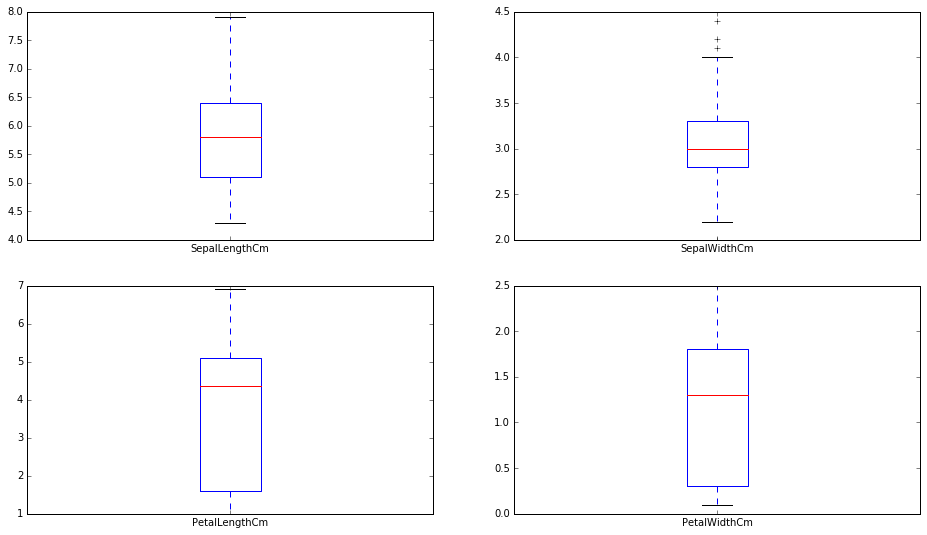

In [14]:
#Box and whisker plots
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(16,9))
plt.show()

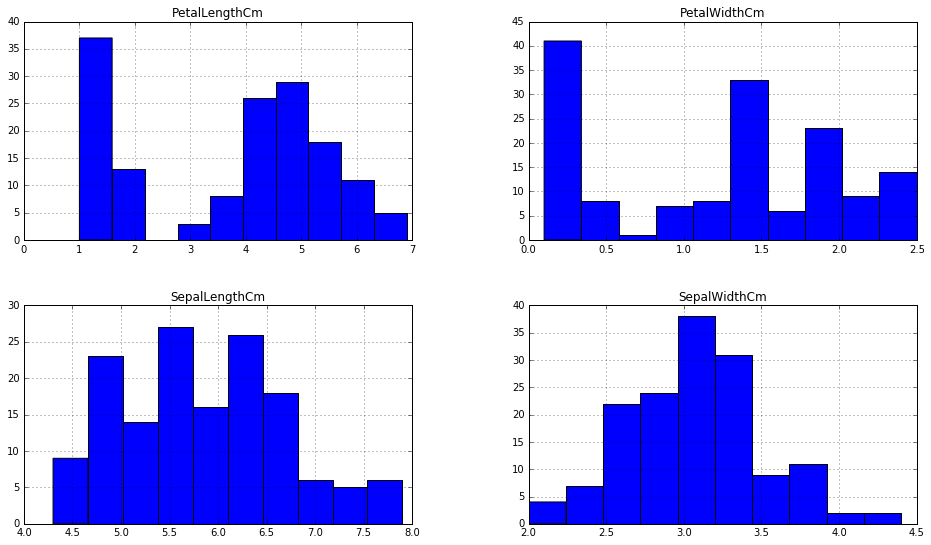

In [15]:
#Histograms
iris_df.hist(figsize=(16,9))
plt.show()

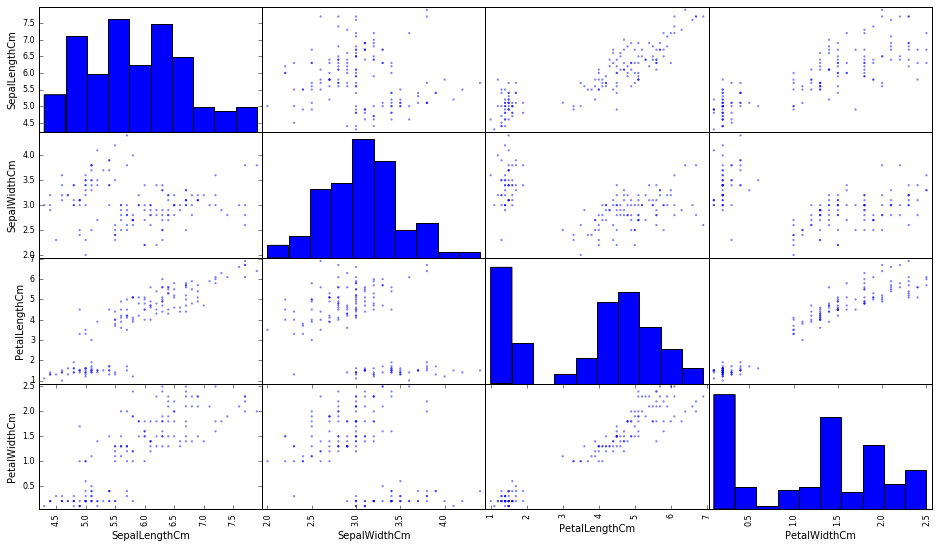

In [16]:
#Scatter plot matrix
scatter_matrix(iris_df, figsize=(16,9))
plt.show()

### Transforming iris data into 3 dimensions

In [17]:
#Using sklearn.decomposition.PCA for 3 components and transforming the dimension of iris.data values
X_reduced = PCA(n_components=3).fit_transform(iris.data)
X_reduced

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

In [18]:
#Assigning iris.target values to variable y
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

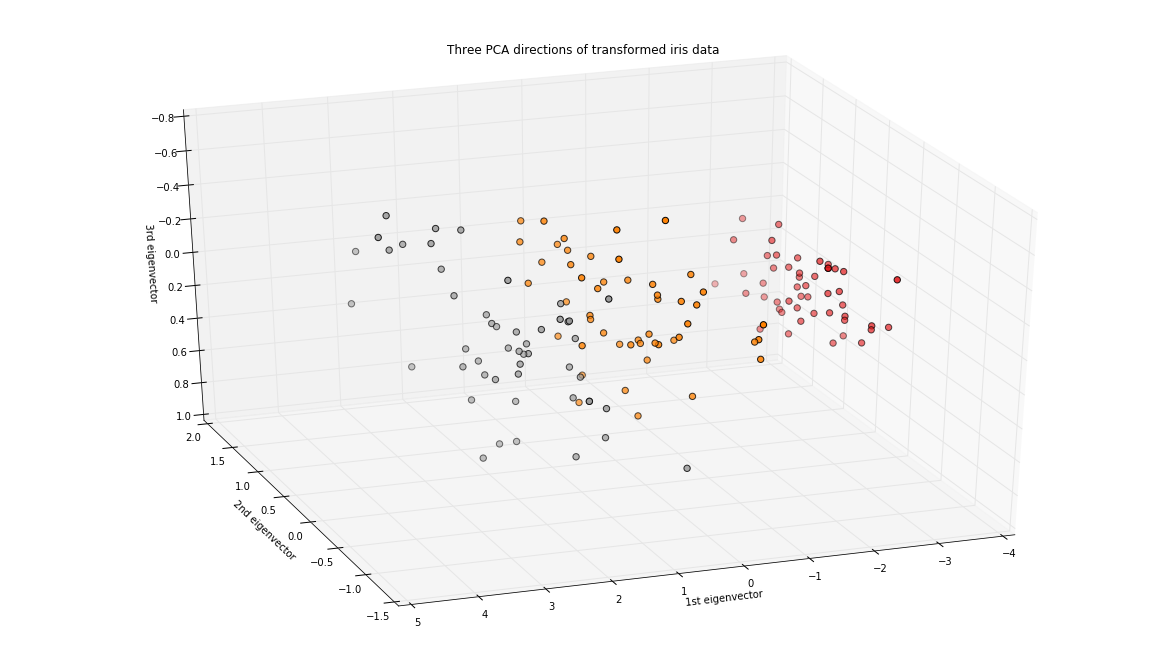

In [19]:
#Plots a 3d chart with transformed dimensions and color each data point with specific class
fig = plt.figure(figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Three PCA directions of transformed iris data")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()